# Matplotlib module

__<div style="text-align: right"> ASE3001: Computational Experiments for Aerospace Engineering, Inha University. </div>__
_<div style="text-align: right"> Jong-Han Kim (jonghank@inha.ac.kr) </div>_

Matplotlib is a plotting library. This section gives a brief introduction to the `matplotlib.pyplot` module, which provides a plotting system similar to that of MATLAB.

To use the `matplotlib.pyplot` module, you first need to import it, with the optional `as plt` (or whatever name you'd like to call by) that declare the alias.

In [1]:
import matplotlib.pyplot as plt

Importing `numpy` is not necessary for importing `matplotlib`, but you will usually do, because your data will be expressed in the array format.

In [2]:
import numpy as np

### Plot

The most frequently used function in `matplotlib` should be `plot`, which allows you to plot 2D data.

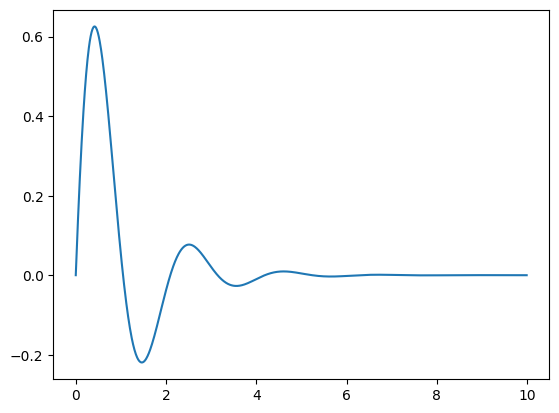

In [3]:
t = np.arange(0,10,0.01)    # points from 0 to 10 spaced by 0.01
x1 = np.exp(-t)*np.sin(3*t)
plt.figure()
plt.plot(t,x1)
plt.show()

Other useful functions and expressions you will use follow below.

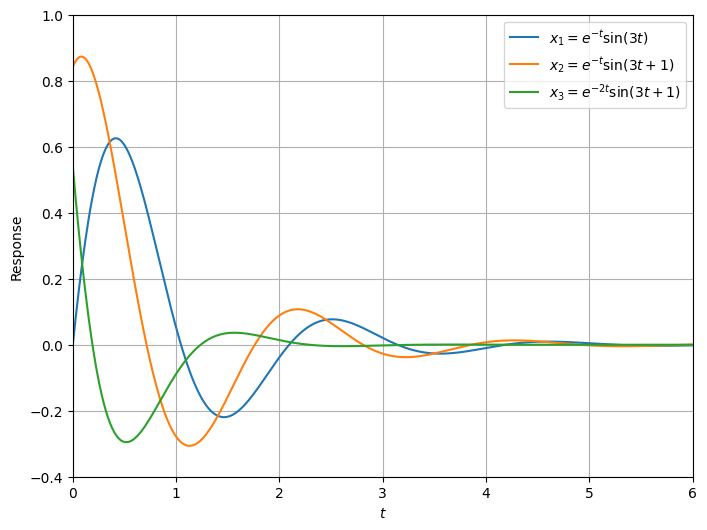

In [4]:
t = np.linspace(0,10,1000)   # equally spaced 1000 points from 0 to 10
x1 = np.exp(-t)*np.sin(3*t)
x2 = np.exp(-t)*np.sin(3*t+1)
x3 = np.exp(-2*t)*np.cos(3*t+1)
plt.figure(figsize=(8,6))
plt.plot(t,x1, label=r'$x_1=e^{-t}\sin(3t)$')
plt.plot(t,x2, label=r'$x_2=e^{-t}\sin(3t+1)$')
plt.plot(t,x3, label=r'$x_3=e^{-2t}\sin(3t+1)$')
plt.xlabel(r'$t$')
plt.ylabel('Response')
plt.xlim(0,6)
plt.ylim(-0.4,1)
plt.grid()
plt.legend()
plt.savefig('responses.png')
plt.show()


You will have to draw log-scale plots at some points in your career as an electrical engineer.

The following draws the Bode plots of
$$
    G(s) = \frac{s+3}{s^2+s+3}
$$

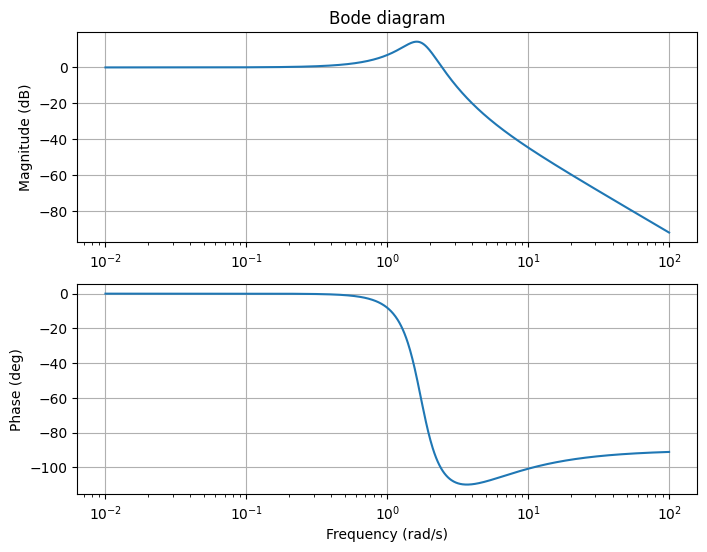

In [5]:
w = np.logspace(-2,2,1000)   # log-spaced 1000 points from 0.01 to 100
s = w*1j                     # s = jw
g = (s+3)/(s*s+s+3)          # G(s)=(s+3)/(s^2+s+3)
plt.figure(figsize=(8,6))
plt.subplot(211)
plt.semilogx(w,20*np.log(abs(g)))
plt.ylabel('Magnitude (dB)')
plt.grid(True)
plt.title('Bode diagram')
plt.subplot(212)
plt.semilogx(w,180/np.pi*np.angle(g))
plt.ylabel('Phase (deg)')
plt.xlabel('Frequency (rad/s)')
plt.grid()
plt.savefig('bodeplot.png')
plt.show()

And the Nyquist diagram of the above?

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


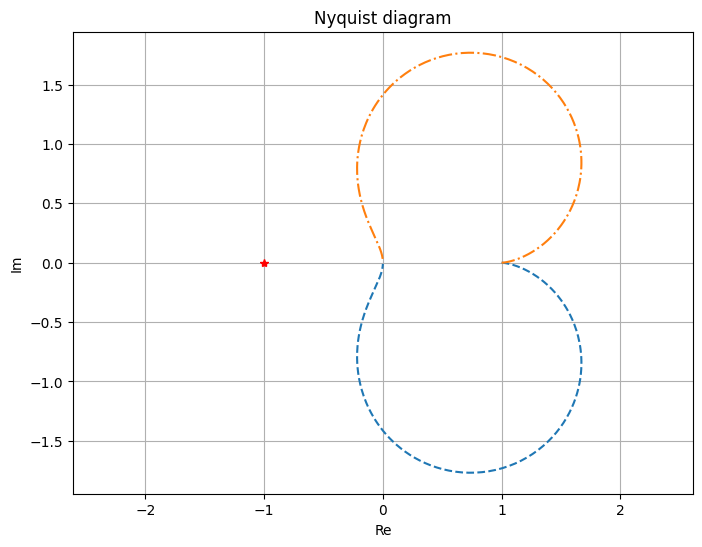

In [6]:
plt.figure(figsize=(8,6))
plt.plot(np.real(g),np.imag(g),'--')
plt.plot(np.real(g),-np.imag(g),'-.')
plt.plot(-1,0,'r*')
plt.title('Nyquist diagram')
plt.xlabel('Re')
plt.ylabel('Im')
plt.axis('equal')
plt.xlim(-1.5,1.5)
plt.grid()
plt.savefig('nyquistplot.png')
plt.show()


Scatter plots. You will get to know, at some point in this class, how you can have your computer to automatically cluster those data points for you.

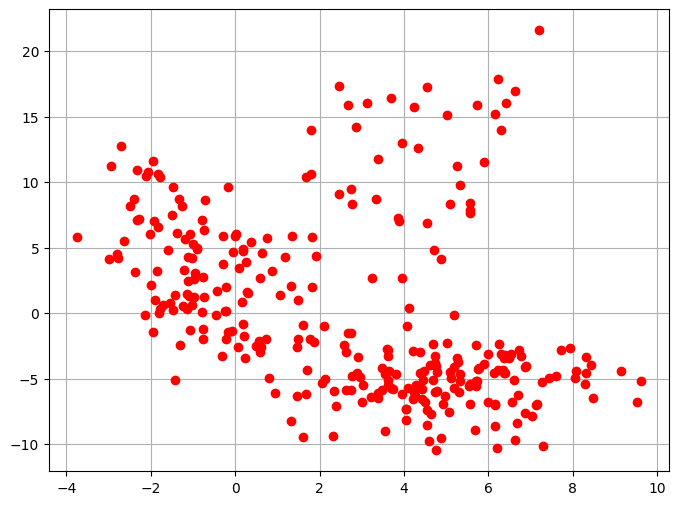

In [7]:
np.random.seed(0)
x1 = np.random.randn(2,100)
x2 = 5*np.random.rand(2,50)
x3 = np.random.randn(2,150)

A1 = np.array([[1,-0.5],[-0.5,4]])
A2 = np.array([[1,0.5],[0.5,4]])
A3 = np.array([[2,0],[0,2]])

b1 = np.array([-1,3]).reshape(2,1)
b2 = np.array([0,0]).reshape(2,1)
b3 = np.array([5,-5]).reshape(2,1)

y1 = np.dot(A1,x1) + b1
y2 = np.dot(A2,x2) + b2
y3 = np.dot(A3,x3) + b3

plt.figure(figsize=(8,6))
#plt.plot(y1[0,:], y1[1,:], 'ro', alpha=0.5)
#plt.plot(y2[0,:], y2[1,:], 'bv', alpha=0.5)
#plt.plot(y3[0,:], y3[1,:], 'k^', alpha=1.0)
plt.plot(y1[0,:], y1[1,:], "ro")
plt.plot(y2[0,:], y2[1,:], "ro")
plt.plot(y3[0,:], y3[1,:], "ro")
#plt.legend(['A','B','C'])
plt.grid()
plt.show()

Histograms.

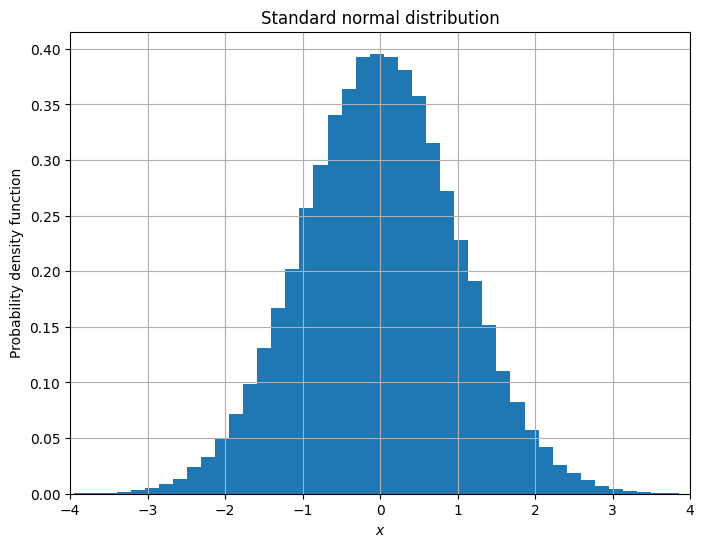

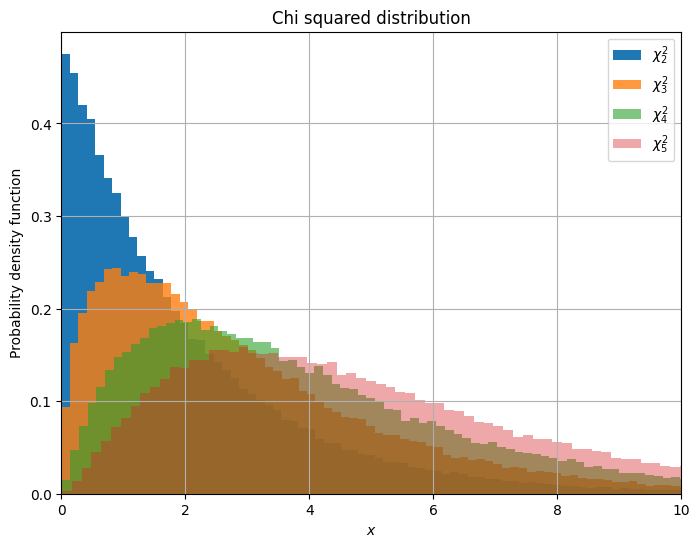

In [8]:
x = np.random.randn(100000,5)

plt.figure(figsize=(8,6))
plt.hist(x[:,0], 50, density=1)
plt.title('Standard normal distribution')
plt.grid()
plt.xlabel(r'$x$')
plt.ylabel('Probability density function')
plt.xlim(-4,4)
plt.grid(True)
plt.show()

xsq = x*x
x2 = np.sum(xsq[:,0:2], axis=1)
x3 = np.sum(xsq[:,0:3], axis=1)
x4 = np.sum(xsq[:,0:4], axis=1)
x5 = np.sum(xsq[:,0:5], axis=1)

plt.figure(figsize=(8,6))
plt.hist(x2, 200, density=1, alpha=1.0)
plt.hist(x3, 200, density=1, alpha=0.8)
plt.hist(x4, 200, density=1, alpha=0.6)
plt.hist(x5, 200, density=1, alpha=0.4)
plt.title('Chi squared distribution')
plt.grid()
plt.xlabel(r'$x$')
plt.ylabel('Probability density function')
plt.xlim(0,10)
plt.legend([r'$\chi^2_2$',r'$\chi^2_3$',r'$\chi^2_4$',r'$\chi^2_5$'])
plt.grid(True)
plt.show()